<a href="https://colab.research.google.com/github/nat-20/TrabajoFinal/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO FINAL

*Tratamiento de Señales III*

*Facultad de Ingeniería*

*Universidad de Antioquia*

*Prof. Hernán Felipe García*

*Alejandra Zuleta Gónzalez, Santiago Patiño Guerrero y Natalia Pérez Puentes*

*2021-2*


Utilizaremos la base de datos [CIC-IDS2017](https://www.unb.ca/cic/datasets/ids-2017.html)


---



Los sistemas de detección de intrusiones (IDS) y los sistemas de prevención de intrusiones (IPS) son las herramientas de defensa más importantes contra los sofisticados y crecientes ataques a la red. Debido a la falta de conjuntos de datos de prueba y validación fiables, los enfoques de detección de intrusiones basados en anomalías sufren evoluciones de rendimiento consistentes y precisas.

Las evaluaciones de los once conjuntos de datos existentes desde 1998 en el instituto de ciberseguridad de canadá muestran que la mayoría están desfasados y son poco fiables. Algunos de estos conjuntos de datos adolecen de falta de diversidad y volumen de tráfico, otros no cubren la variedad de ataques conocidos, mientras que otros anonimizan los datos de carga útil de los paquetes, lo que no puede reflejar las tendencias actuales. Algunos también carecen de un conjunto de características y metadatos.

El conjunto de datos CICIDS2017 contiene los ataques benignos y los ataques comunes más actuales, que se asemejan a los verdaderos datos del mundo real (PCAPs). La generación de un tráfico de fondo realista fue la principal prioridad a la hora de crear este conjunto de datos. Se utilizó un sistema B-Profile (Sharafaldin, et al. 2016) para perfilar el comportamiento abstracto de las interacciones humanas y genera tráfico de fondo benigno naturalista. Para este conjunto de datos, se construyó el comportamiento abstracto de 25 usuarios basado en los protocolos HTTP, HTTPS, FTP, SSH y correo electrónico.

El periodo de captura de datos comenzó a las 9 de la mañana del lunes 3 de julio de 2017 y finalizó a las 17 horas del viernes 7 de julio de 2017, para un total de 5 días. El lunes es el día normal y solo incluye el tráfico benigno. Los ataques ejecutados incluyen Fuerza Bruta FTP, Fuerza Bruta SSH, DoS, Heartbleed, Ataque Web, Infiltración, Botnet y DDoS. Se han ejecutado tanto por la mañana como por la tarde del martes, miércoles, jueves y viernes.


Cabe aclarar que la página de la Universidad de Ciberseguridad de Canadá cuenta con una base de datos para aplicaciones de inteligencia computacional, donde las variables categóricas son removidas. Dicha base de datos es la que se importa a continuación:

In [1]:
%%capture
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13VRs5fj-QoP2sbZE8X7Maes6lwxf_3K2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13VRs5fj-QoP2sbZE8X7Maes6lwxf_3K2" -O monday.csv && rm -rf /tmp/cookies.txt 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13VRs5fj-QoP2sbZE8X7Maes6lwxf_3K2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13VRs5fj-QoP2sbZE8X7Maes6lwxf_3K2" -O tuesday.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13OIvjFVRM59tBnKgWe-dFmTihXAnk5aJ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13OIvjFVRM59tBnKgWe-dFmTihXAnk5aJ" -O wednesday.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13GUcNrwBk_AnZUc3iZBav3ozMy25pfRh' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13GUcNrwBk_AnZUc3iZBav3ozMy25pfRh" -O thursday_morning.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13CIJP9Jf3PDQ0vyfwQgALZd3YyoL6vlu' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13CIJP9Jf3PDQ0vyfwQgALZd3YyoL6vlu" -O thursday_afternoon.csv && rm -rf /tmp/cookies.txt 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13SRgNHXw7UJmiQLJjov7xupWuDw4VFix' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13SRgNHXw7UJmiQLJjov7xupWuDw4VFix" -O friday_morning.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13EEFceZOCkCEVBud6eHOQ4Yr2_uVdOR2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13EEFceZOCkCEVBud6eHOQ4Yr2_uVdOR2" -O friday_afternoon_1.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13NUaGG1su72XNHZ3IXka80uWHbPnx28U' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13NUaGG1su72XNHZ3IXka80uWHbPnx28U" -O friday_afternoon_2.csv && rm -rf /tmp/cookies.txt

In [2]:
#librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sn
from sklearn.model_selection import train_test_split

In [3]:
df_monday=pd.read_csv('monday.csv')
df_tuesday=pd.read_csv("/content/tuesday.csv")
df_wednesday=pd.read_csv("/content/wednesday.csv")
df_thursday_morning=pd.read_csv("/content/thursday_morning.csv")
df_thursday_afternoon=pd.read_csv("/content/thursday_afternoon.csv")
df_friday_morning=pd.read_csv("/content/friday_morning.csv")
df_friday_afternoon_1=pd.read_csv("/content/friday_afternoon_1.csv")
df_friday_afternoon_2=pd.read_csv("/content/friday_afternoon_2.csv")

In [4]:
df_attack = df_monday.append(df_tuesday, ignore_index=True)
df_attack = df_attack.append(df_wednesday, ignore_index=True)
df_attack = df_attack.append(df_thursday_morning, ignore_index=True)
df_attack = df_attack.append(df_thursday_afternoon, ignore_index=True)
df_attack = df_attack.append(df_friday_morning, ignore_index=True)
df_attack = df_attack.append(df_friday_afternoon_1, ignore_index=True)
df_attack = df_attack.append(df_friday_afternoon_2, ignore_index=True)

In [ ]:
df_attack.iloc[:,-1].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [ ]:
df_attack.iloc[:,-1].value_counts()

BENIGN                        2175253
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
FTP-Patator                     15876
SSH-Patator                     11794
DoS GoldenEye                   10293
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

De la ejecución de la anterior celda se puede evidenciar que la base de datos está bastante desbalanceada, pero este es el comportamiento que se tiene en la realidad.

In [ ]:
y_new = df_attack.iloc[:,-1]
y_new[np.where(df_attack.iloc[:,-1] != 'BENIGN')[0]] = 'Attack'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X = df_attack.iloc[:,:78]
X = X.values
y = y_new.values

X = X[~np.isnan(X).any(axis=1), :]
y = y[np.where(~np.isnan(X).any(axis=1)==True)[0]]
X = X[~np.isinf(X).any(axis=1), :]
y = y[np.where(~np.isinf(X).any(axis=1)==True)[0]]

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = y.reshape(-1,1)

print(X.shape)
print(y.shape)

(2744040, 78)
(2744040, 1)


Se decide utilizar el 70% de los datos para entrenamiento y el 30% de los datos para prueba.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2 Clases: 'BENIGN' and 'Attack'

Inicialmente se realiza una clasificación binaria para detectar si hay o no ataques. Para esto se utiliza el MLPClassifier y el RandomForestClassifier.

El [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), es un clasificador Perceptron multicapa. Este modelo optimiza la función de pérdida utilizando LBFGS o descenso de gradiente estocástico.

Por otra parte, el [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) es un metaestimador que ajusta una serie de clasificadores de árboles de decisión en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste.

### MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
print('Model Score:', clf.score(X_test, y_test))

Model Score: 0.9273141332189169


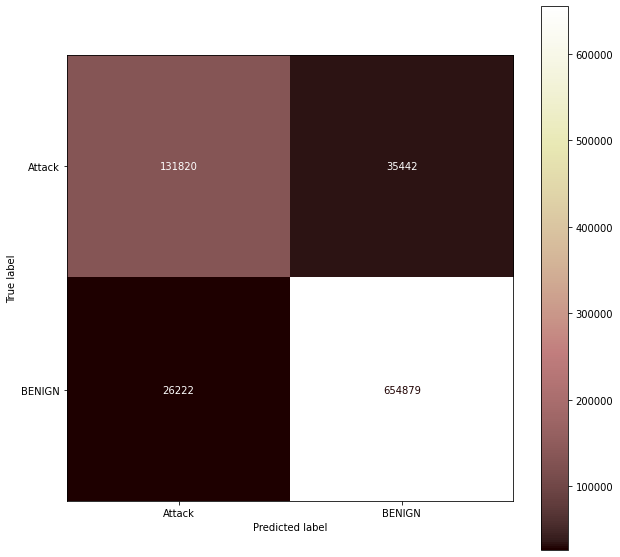

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=np.unique(y))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax,cmap='pink')
plt.show()

### RandomForestClassifier

En este caso se utilizan 5 estimadores porque han mostrado buenos resultados en artículos encontrados en el estado del arte.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5).fit(X_train, y_train)
y_pred_ran = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print('Model Score: ', model.score(X_test, y_test))

Model Score:  0.9300496105498948


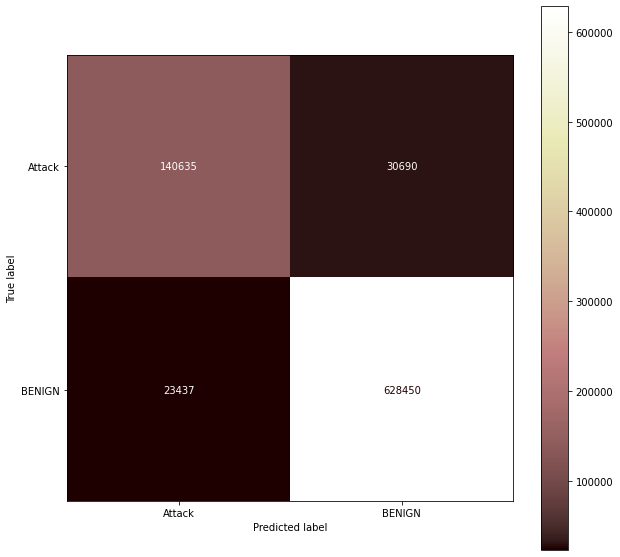

In [ ]:
cm = confusion_matrix(y_test, y_pred_ran)
cmp = ConfusionMatrixDisplay(cm,display_labels=np.unique(y))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax,cmap='pink')
plt.show()

A continuación se incrementa el número de estimadores a 50, obteniendo lo siguiente:

In [ ]:
model2 = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)
y_pred_ran = model2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print('Model Score: ', model2.score(X_test, y_test))

Model Score:  0.9342805984363688


### Observaciones
- El score obtenido es 92.73% y 93.9% para el MLP y el RandomForest respectivamente. Cabe aclarar que por el volumen de datos utilizando MLPClassifier el tiempo de ejecución fue muy alto, por esto se dejó entrenar el sistema alrededor de 40 minutos y el score y la matriz de confusión se sacaron con base al mejor modelo que el sistema obtuvo en este tiempo. Sin embargo, los resultados obtenidos son buenos a pesar del desbalance de la base de datos y que el no se llega al mejor modelo, por lo que se podrían mejorar estos resultados. 

- En el caso del RandomForestClassifier es un algoritmo más optimo que tuvo un tiempo de ejecución menor a 20 minutos.

- Incrementar el número de estimadores del clasificador RandomForest 10 veces en este caso, no representa mayor beneficio puesto que el desempeño mejoró solo un 0.4% y el tiempo de ejecución aumentó. Por esto, para los siguientes análisis se va a seguir trabajando con 5 estimadores.

- Cabe resaltar que aquí no se pudo aplicar PCA dado el volumen de datos y las limitaciones de RAM de Colab. Por esta razón, se opta por utilizar el 20% de los datos de cada una de las clases, para mantener la distribución inicial e igual se sigue teniendo una buena cantidad de datos.

### 20% de los datos de cada una de las clases

In [ ]:
df_attack.iloc[:,-1].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [5]:
df_bening = df_attack.loc[df_attack[' Label'] == 'BENIGN']
df_Dos_Hulk = df_attack.loc[df_attack[' Label'] == 'DoS Hulk']
df_PortScan = df_attack.loc[df_attack[' Label'] == 'PortScan']
df_DDoS = df_attack.loc[df_attack[' Label'] == 'DDoS']
df_DoS_GoldenEye = df_attack.loc[df_attack[' Label'] == 'DoS GoldenEye']
df_FTP_Patator = df_attack.loc[df_attack[' Label'] == 'FTP-Patator']
df_SSH_Patator = df_attack.loc[df_attack[' Label'] == 'SSH-Patator']
df_DoS_slowloris = df_attack.loc[df_attack[' Label'] == 'DoS slowloris']
df_DoS_Slowhttptest = df_attack.loc[df_attack[' Label'] == 'DoS Slowhttptest']
df_Web_Attack_Brute_Force = df_attack.loc[df_attack[' Label'] == 'Web Attack � Brute Force']
df_Bot = df_attack.loc[df_attack[' Label'] == 'Bot']
df_Web_Attack_XSS  = df_attack.loc[df_attack[' Label'] == 'Web Attack � XSS']
df_Infiltration = df_attack.loc[df_attack[' Label'] == 'Infiltration']
df_Web_Attack_Sql_Injection = df_attack.loc[df_attack[' Label'] == 'Web Attack � Sql Injection']
df_Heartbleed = df_attack.loc[df_attack[' Label'] == 'Heartbleed']

In [6]:
df_new = df_bening.sample(n=int(np.round(df_bening.shape[0]*0.2)),random_state=42)
df_new = df_new.append(df_Dos_Hulk.sample(n=int(np.round(df_Dos_Hulk.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_PortScan.sample(n=int(np.round(df_PortScan.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_DDoS.sample(n=int(np.round(df_DDoS.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_DoS_GoldenEye.sample(n=int(np.round(df_DoS_GoldenEye.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_FTP_Patator.sample(n=int(np.round(df_FTP_Patator.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_SSH_Patator.sample(n=int(np.round(df_SSH_Patator.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_DoS_slowloris.sample(n=int(np.round(df_DoS_slowloris.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_DoS_Slowhttptest.sample(n=int(np.round(df_DoS_Slowhttptest.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_Web_Attack_Brute_Force.sample(n=int(np.round(df_Web_Attack_Brute_Force.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_Bot.sample(n=int(np.round(df_Bot.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_Web_Attack_XSS.sample(n=int(np.round(df_Web_Attack_XSS.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_Infiltration.sample(n=int(np.round(df_Infiltration.shape[0])),random_state=42),ignore_index=True)
df_new = df_new.append(df_Web_Attack_Sql_Injection.sample(n=int(np.round(df_Web_Attack_Sql_Injection.shape[0])),random_state=42),ignore_index=True)
df_new = df_new.append(df_Heartbleed.sample(n=int(np.round(df_Heartbleed.shape[0])),random_state=42),ignore_index=True)

In [7]:
df_new.shape

(549401, 79)

La nueva distribución de los datos se muestra a continuación:

In [8]:
print(len(df_new.iloc[:,-1].value_counts()))
df_new.iloc[:,-1].value_counts()

15


BENIGN                        435051
DoS Hulk                       46215
PortScan                       31786
DDoS                           25605
FTP-Patator                     3175
SSH-Patator                     2359
DoS GoldenEye                   2059
DoS slowloris                   1159
DoS Slowhttptest                1100
Bot                              393
Web Attack � Brute Force         301
Web Attack � XSS                 130
Infiltration                      36
Web Attack � Sql Injection        21
Heartbleed                        11
Name:  Label, dtype: int64

In [ ]:
y_new = df_new.iloc[:,-1]
y_new[np.where(df_new.iloc[:,-1] != 'BENIGN')[0]] = 'Attack'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X = df_new.iloc[:,:78]
y = y_new
X = X.values
y = y.values

X = X[~np.isnan(X).any(axis=1), :]
y = y[np.where(~np.isnan(X).any(axis=1)==True)[0]]
X = X[~np.isinf(X).any(axis=1), :]
y = y[np.where(~np.isinf(X).any(axis=1)==True)[0]]

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = y.reshape(-1,1)

print(X.shape)
print(y.shape)

(548781, 78)
(548781, 1)


In [ ]:
y_new.unique()

array(['BENIGN', 'Attack'], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Como el RandomForestClassifier mostró mejores resultados, la siguiente prueba con menos volumen de datos se realiza con dicho clasificador.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5).fit(X_train, y_train)
y_pred_ran = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print('Model Score: ', model.score(X_test, y_test))

Model Score:  0.9976007531812798


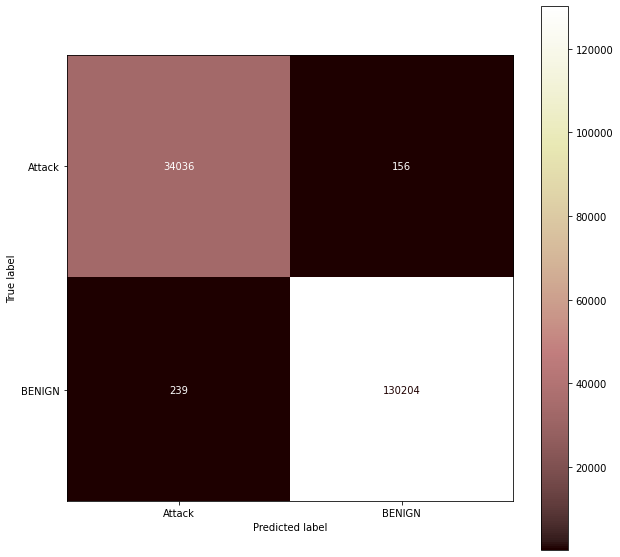

In [ ]:
cm = confusion_matrix(y_test, y_pred_ran)
cmp = ConfusionMatrixDisplay(cm,display_labels=np.unique(y))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax,cmap='pink')
plt.show()

En este caso, el tiempo de ejecución disminuye notablemente y la precisión del modelo aumentó al 99%.

## Clasificación multiclase

A continuación se realiza una clasificación de las 15 clases utilizando una SVM, el randomForestClassifier y el MLPClassifier, en donde se aplica PCA para reducir la dimensionalidad de las variables puesto que se tienen 78 características. Se decide trabajar con componentes que representen el 98% de la varianza de los datos, lo cual en este caso corresponde a 31 variables en el espacio latente. También dado el volumen de datos y las limitaciones de RAM de Colab, se opta por utilizar el 20% de los datos de cada una de las clases, para mantener la distribución inicial.

Una SVM o máquina de soporte vectorial funciona correlacionando datos a un espacio de características de grandes dimensiones de forma que los puntos de datos se puedan categorizar, incluso si los datos no se puedan separar linealmente de otro modo.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.98)
X_pca = pca.fit_transform(X) # Transformamos los datos al espacio latente

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (548781, 78)
transformed shape: (548781, 31)


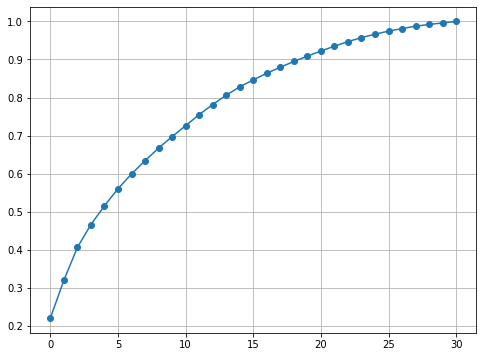

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_),'o-')
plt.grid()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

### SVM

In [ ]:
modelSVM = svm.SVC(C = 10, kernel = 'rbf')
modelSVM.fit(X_train,y_train)
yPred = modelSVM.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('Model Score: ', modelSVM.score(X_test, y_test))

Model Score:  0.9653050687885322


Acc:  0.9653050687885322


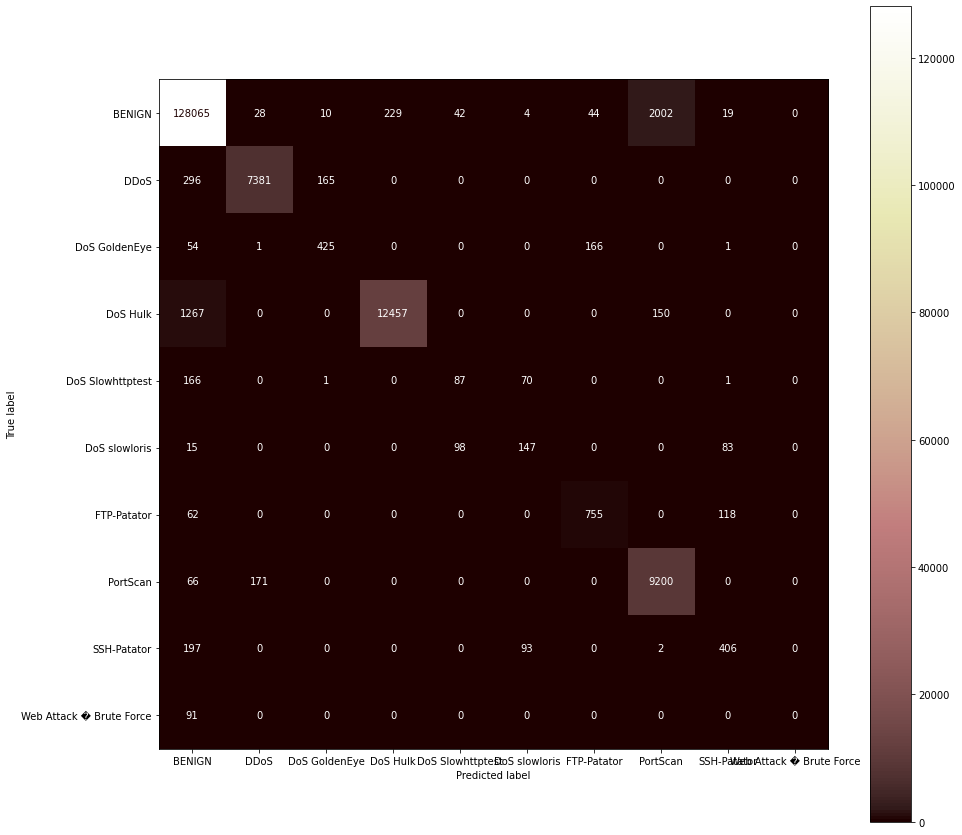

In [ ]:
cm = confusion_matrix(y_test, yPred)
porcentajeAcierto = np.sum(np.diag(cm)) / len(y_test)
print('Acc: ',porcentajeAcierto)
cmp = ConfusionMatrixDisplay(cm,display_labels=np.unique(y))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='pink')
plt.show()

### MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred = clf2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('Model Score: ', clf2.score(X_test, y_test))

Model Score:  0.9842500075925532


Acc:  0.9842500075925532


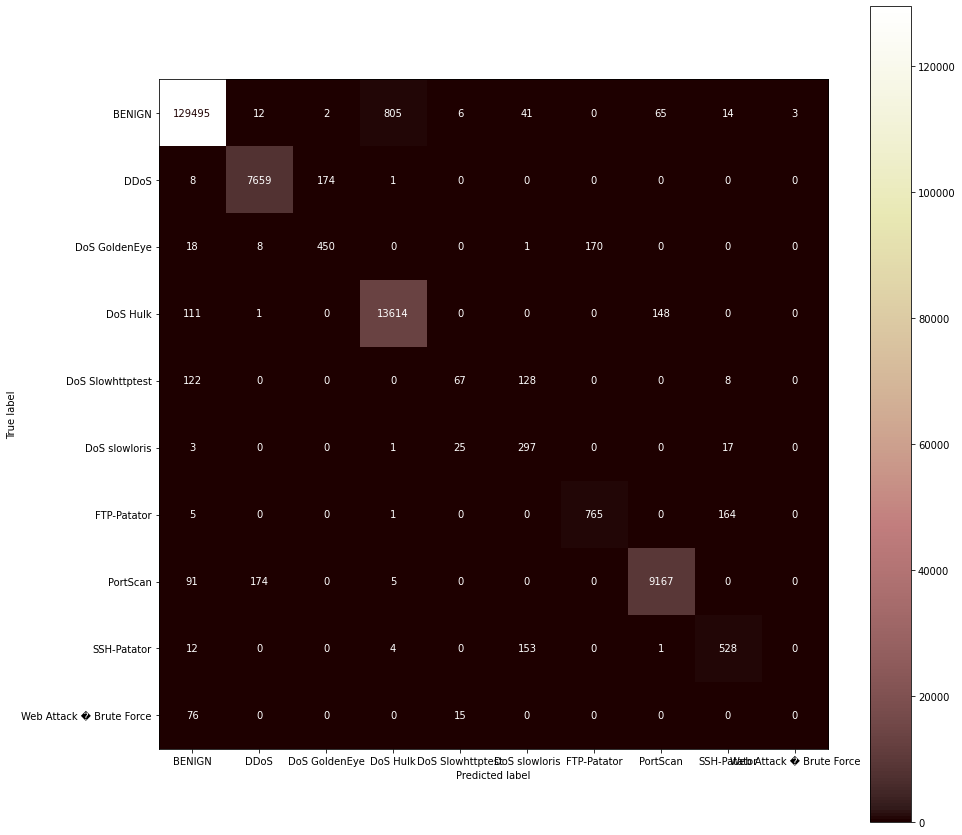

In [ ]:
cm = confusion_matrix(y_test, y_pred)
porcentajeAcierto = np.sum(np.diag(cm)) / len(y_test)
print('Acc: ',porcentajeAcierto)
cmp = ConfusionMatrixDisplay(cm,display_labels=np.unique(y))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='pink')
plt.show()

In [ ]:
print(len(np.unique(y_pred)))
np.unique(y_pred)

10


array(['BENIGN', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
       'DoS slowloris', 'FTP-Patator', 'PortScan', 'SSH-Patator',
       'Web Attack � Brute Force'], dtype='<U24')

### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelRandom2 = RandomForestClassifier(n_estimators=5).fit(X_train, y_train)
y_pred_ran_2 = modelRandom2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print('Model Score: ', modelRandom2.score(X_test, y_test))

Model Score:  0.9870805114343851


Acc:  0.9870805114343851


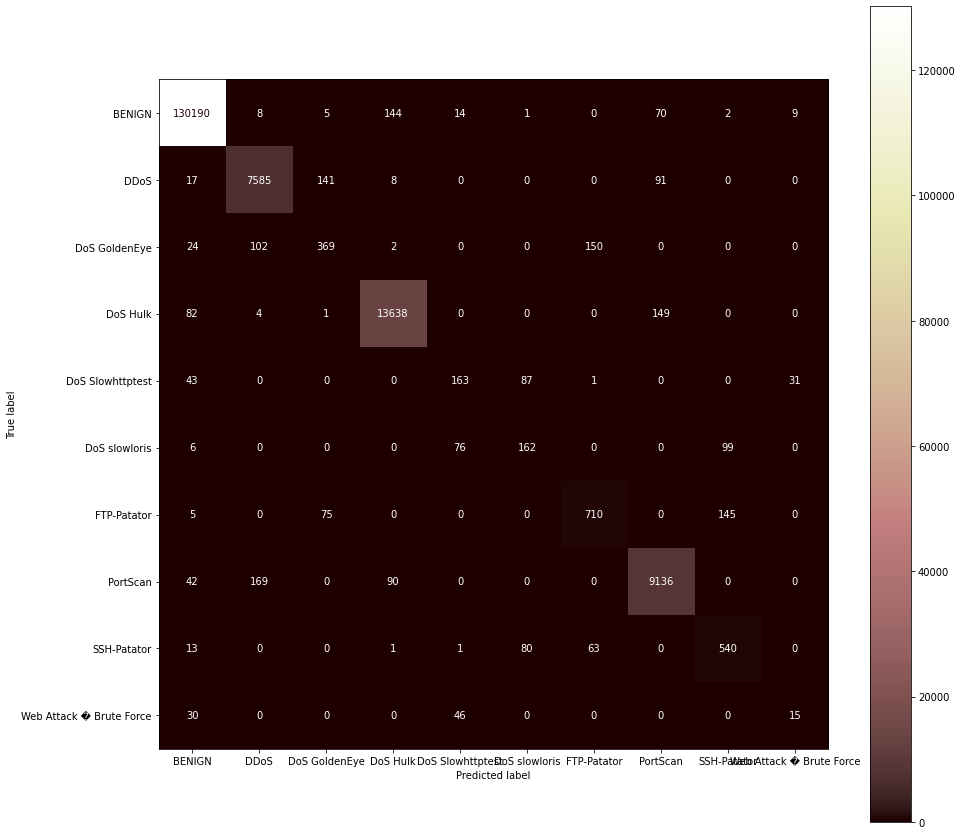

In [ ]:
cm = confusion_matrix(y_test, y_pred_ran_2)
porcentajeAcierto = np.sum(np.diag(cm)) / len(y_test)
print('Acc: ',porcentajeAcierto)
cmp = ConfusionMatrixDisplay(cm,display_labels=np.unique(y))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='pink')
plt.show()

In [ ]:
print(len(np.unique(y_pred_ran_2)))
np.unique(y_pred_ran_2)

10


array(['BENIGN', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
       'DoS slowloris', 'FTP-Patator', 'PortScan', 'SSH-Patator',
       'Web Attack � Brute Force'], dtype=object)

### Observaciones
### Observaciones
- La máquina de soporte vectorial tuvo un tiempo de ejecución de aproximadamente 2 horas. Por otra parte, el MLPClassifier tuvo un tiempo de ejecución cercano a 40 minutos y el RandomForest fue el que tardó menor con un tiempo de ejecución de menos de 10 minutos. 

- El randomForest fue el algoritmo más rápido y el que mejores resultados obtuvo (98.7% de precisión), aunque en realidad se asemeja mucho con el resultado obtenido con el MLPClassifier (98.4% de precisión), sin embargo el tiempo de ejecución representa una gran ventaja para optar por este como solución.

- Solo se logran obtener 10 de las 15 clases con los 3 algoritmos aplicados. Las clases que no lograron detectarse tenían muy poco datos, dejando por fuera las clases Web Attack XSS, Infiltration, WebAttack Sql Injection, Heartbleed y Bot. Con base en lo anterior se puede pensar en la fusión de clases de la misma familia de ataques y no de ataques individuales que por su poca frecuencia tienen muy pocas muestras para entrenar correctamente al modelo.

- Por otra parte, según las matrices de confusión el único algoritmo que logra clasificar al menos 15 datos de prueba de la clase Web Attack Brute Force de forma correcta es el RandomForestClassifier, en los otros dos casos no hubo ninguna clasificación correcta.

- Con la SVM una gran parte de los datos de prueba de la clase portscan se clasifican como tráfico benigno, sin embargo este comportamiento desaparece con los otros dos métodos. Se resalta también que aproximadamente 150 datos pertenecientes a las clase portscan se clasifican como de la clase DOS Hulk en los 3 modelos, por lo que suponemos que esos datos en específico tienen características muy parecidas.

- Cabe resaltar que a pesar de que el accuracy es bueno, la matriz de confusión muestra que hay clases donde se equivoca gran cantidad de veces, pero los volúmenes de datos como benigno, Dos Hulk y PortScan al estar en su mayor parte bien clasificados arrastran el desempeño del sistema. Si se mira por cada una de las clases hay unas donde la clasificación daría un menor desempeño.


A continuación se muestra una tabla resumen con los desempeños obtenidos:

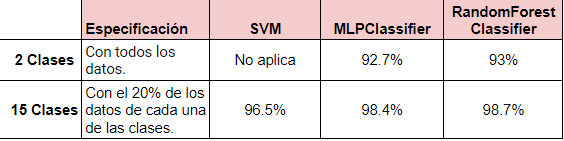

# Conclusiones

- El algoritmo de clasificación que mejor beneficio muestra tanto en accuracy como en tiempo de ejecución en todos los casos es el randomForestClassifier. En el caso de la SVM y el MLPClassifier puede que otra configuración de parámetros arroje mejores resultados, pero probarlo es muy difícil dado su alto tiempo de ejecución.

- Se logran precisiones muy buenas pero hay que tener en cuenta que solo se trabajó con un porcentaje de los datos (20% de cada una de las clases), como trabajo futuro se podrían utilizar todos los datos en un equipo o un servidor con mayores capacidades de RAM y almacenamiento. De hecho se evidencia que al trabajar con todos los datos se obtiene un accuracy menor para dos clases, por lo que es de suponer que para más clases se va a reflejar más este comportamiento.

- Se podría pensar en la implementación de un modelo que trabaje en cascada, donde se clasifiquen las mismas familias de ataques (por ejemplo los DoS, los Web Attack y los tipos Patator) en la primera etapa y posteriormente, haya otro clasificador especializado en los tipos contenidos cada una de las familias (por ejemplo en los tipo Patator los FTP y SSH).